In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [13]:
# Load your dataset
data = pd.read_csv(r"data\Titanic-Dataset.csv")
df = data.copy()
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


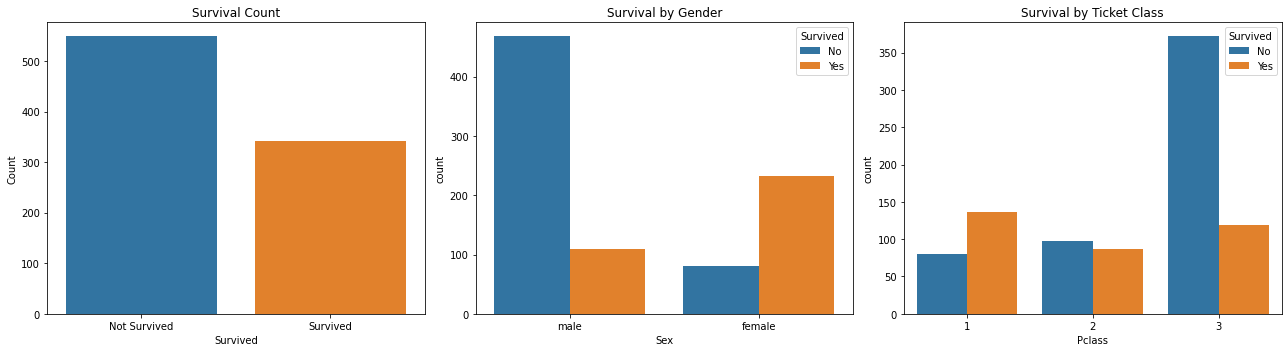

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Survival Count
sns.countplot(ax=axes[0], x='Survived', data=data)
axes[0].set_title('Survival Count')
axes[0].set_xticklabels(['Not Survived', 'Survived'])
axes[0].set_ylabel('Count')

# 2. Survival by Gender
sns.countplot(ax=axes[1], x='Sex', hue='Survived', data=data)
axes[1].set_title('Survival by Gender')
axes[1].legend(title='Survived', labels=['No', 'Yes'])

# 3. Survival by Ticket Class
sns.countplot(ax=axes[2], x='Pclass', hue='Survived', data=data)
axes[2].set_title('Survival by Ticket Class')
axes[2].legend(title='Survived', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

In [18]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True) #these columns don't effect survival chances of the person so we remove them

In [19]:
df['Age'].fillna(df['Age'].median(), inplace=True) #replacing null values in age column with the median age of all people
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) #replacing null values in embarked (place which they got on) with mode of the column.


In [20]:
# Encode Sex
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0 or vice versa depending on encoder

# One-hot encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) #convert the column to two columns, Embarked_Q, Embarked_s to make them numerical

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int32(1), int64(4), uint8(2)
memory usage: 47.1 KB


In [23]:

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



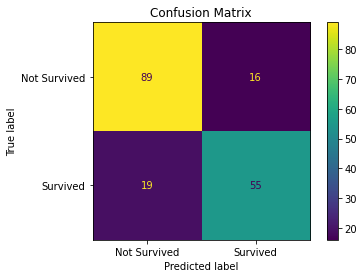

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()


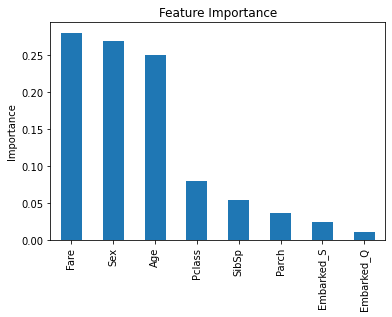

In [26]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()